# (A) Data Cleaning
### Objective: To simplify data for processing

## 1) Importing necessary libraries for data manipulation
- Libraries imported: 

1. ` pandas `
2. ` numpy `
3. ` sklearn.model_selection `
4. ` sklearn `
5. `preprocessing`
6. `sklearn.cluster`
7. `matplotlib.pyplot`
8. `scipy`




In [0]:
#importing packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

Importing files from local file directory

In [0]:
from google.colab import files
uploaded = files.upload()

## 2) Reading dataframe from dataset 
- `.head` method was used to print the first 5 rows of the dataframe

In [0]:
#reading from base dataset
audioset = pd.read_csv('audioset_g.csv', sep=',')
audioset.head()

FileNotFoundError: ignored

## 3) Function to replace complex genre labels with simple ones `genre_simp`
- A function was written `genre_simp` that simplified the numerous genre labels by assigning the genres into 4 main categories
- The following 4 categories were chosen:


1.   *hip hop*
2.   *classic*
3.   *metal*
4.   *country*



In [0]:
def genre_simp(genre):
    if 'hip hop' in genre:
        return 'hip hop'
    elif 'metal' in genre:
        return 'classical'
    elif 'classical' in genre:
        return 'metal'
    elif 'country' in genre:
        return 'country'
    else:
        return 'None'

## 4) Applying genre simplifier function `genre_simp` to genres

In [0]:
#applying the genre simplifier function to the genres
genre_list_simp = audioset['genre'].apply(genre_simp)        

## 5) Combining output genres to the main dataframe `genre`

In [0]:
audioset['genre'] = genre_list_simp
audiosetg = audioset[audioset['genre'].isin(['hip hop', 'country', 'metal', 'classical'])]

## 6) Subsetting the dataframe into the 4 main genre categories 
- Metal songs - `metal_set`
- Classical songs - `classical_set`
- Hip hop songs - `hiphop_set`
- Country songs - `country_set`


In [0]:
#segregate into genres, so we can sample a similar number of songs
metal_set = audiosetg[audiosetg['genre']=='metal']
classical_set = audiosetg[audiosetg['genre']=='classical']
hiphop_set = audiosetg[audiosetg['genre']=='hip hop']
country_set = audiosetg[audiosetg['genre']=='country']

## 7) Assigning a maximum limit of 2000 samples
- Random sampling of each genre, using the `.sample` method

In [0]:
#sample an equal number of each genre
metal_set = metal_set.sample(2000)
classical_set = classical_set.sample(2000)
hiphop_set = hiphop_set.sample(2000)
country_set = country_set.sample(2000)

# (B) Feature Selection
### Objective: Select features that best distinguish between these genres

## 1) Creating a function `genre_boxplot` that plots a boxplot
- To visualize each metric's ability to separate by genre 

In [0]:
#function to print a boxplot of each metric's ability to separate by genre
def genre_boxplot(metric):
    metal_plot = metal_set[metric]
    classical_plot = classical_set[metric]
    hiphop_plot = hiphop_set[metric]
    country_plot = country_set[metric]
    plt.boxplot([metal_plot, classical_plot, hiphop_plot, country_plot])
    plt.show()

### Sample output below

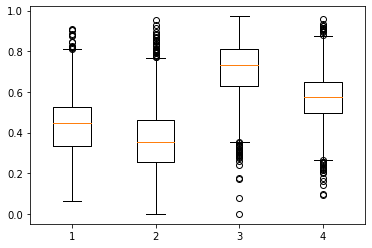

In [0]:
#genres
# genre_boxplot('acousticness')
genre_boxplot('danceability')
# genre_boxplot('duration_ms')
# genre_boxplot('energy')
# genre_boxplot('instrumentalness')
# genre_boxplot('key')
# genre_boxplot('liveness')
# genre_boxplot('loudness')
# genre_boxplot('mode')
# genre_boxplot('speechiness')
# genre_boxplot('tempo')
# genre_boxplot('time_signature')
# genre_boxplot('valence')

## 2) Assumption of normality test
- Used the `stats.shapiro` function to test for assumptions of normal distributions in each song metric

In [0]:
#test for assumption of normality
def norm_test(genreset): 
    results = [stats.shapiro(genreset['acousticness']),
    stats.shapiro(genreset['danceability']),
    stats.shapiro(genreset['duration_ms']),
    stats.shapiro(genreset['energy']),
    stats.shapiro(genreset['instrumentalness']),
    stats.shapiro(genreset['key']),
    stats.shapiro(genreset['liveness']),
    stats.shapiro(genreset['loudness']),
    stats.shapiro(genreset['mode']),
    stats.shapiro(genreset['speechiness']),
    stats.shapiro(genreset['tempo']),
    stats.shapiro(genreset['time_signature']),
    stats.shapiro(genreset['valence'])]
    return results

In [0]:
norm_test(metal_set)
# norm_test(classical_set)
# norm_test(hiphop_set)
# norm_test(country_set)

[(0.3923158049583435, 0.0),
 (0.9923722147941589, 1.0574458642054196e-08),
 (0.8098025321960449, 1.5974802493302915e-43),
 (0.7620030045509338, 0.0),
 (0.6244382262229919, 0.0),
 (0.9323983192443848, 3.484283219046354e-29),
 (0.8069074153900146, 9.388699710976274e-44),
 (0.7939306497573853, 9.80908925027372e-45),
 (0.6314602494239807, 0.0),
 (0.6489204168319702, 0.0),
 (0.9902902841567993, 2.546425292848653e-10),
 (0.3728489875793457, 0.0),
 (0.957698404788971, 1.1416593813306599e-23)]

## 3) Test for significance difference between genres
- Kolmogorov-Smirnoff test was chosen to test for significant difference
- The `stats.ks_2samp` function was used

In [0]:
#function to conduct Kolmogorov-Smirnoff test to test significant difference between genres
def ks_test(genre1,genre2):
    results=[stats.ks_2samp(genre1['acousticness'],genre2['acousticness']),
             stats.ks_2samp(genre1['danceability'],genre2['danceability']),
             stats.ks_2samp(genre1['duration_ms'],genre2['duration_ms']),
             stats.ks_2samp(genre1['energy'],genre2['energy']),
             stats.ks_2samp(genre1['instrumentalness'],genre2['instrumentalness']),
             stats.ks_2samp(genre1['key'],genre2['key']),
             stats.ks_2samp(genre1['liveness'],genre2['liveness']),
             stats.ks_2samp(genre1['loudness'],genre2['loudness']),
             stats.ks_2samp(genre1['mode'],genre2['mode']),
             stats.ks_2samp(genre1['speechiness'],genre2['speechiness']),
             stats.ks_2samp(genre1['tempo'],genre2['tempo']),
             stats.ks_2samp(genre1['time_signature'],genre2['time_signature']),
             stats.ks_2samp(genre1['valence'],genre2['valence'])]
    return results

### Results output shown below

In [0]:
# ks_test(metal_set, classical_set)
# ks_test(metal_set, hiphop_set)
ks_test(metal_set, country_set) #time signature cannot differentiate these
# ks_test(classical_set, hiphop_set)
# ks_test(classical_set, country_set) #key cannot differentiate these
# ks_test(hiphop_set, country_set) #liveness, time_signature cannot differentiate

[Ks_2sampResult(statistic=0.6225, pvalue=0.0),
 Ks_2sampResult(statistic=0.4165, pvalue=9.465459787348435e-156),
 Ks_2sampResult(statistic=0.303, pvalue=2.0431381097305446e-81),
 Ks_2sampResult(statistic=0.5105, pvalue=9.439888327081325e-238),
 Ks_2sampResult(statistic=0.418, pvalue=6.585335580486585e-157),
 Ks_2sampResult(statistic=0.031, pvalue=0.291764846534962),
 Ks_2sampResult(statistic=0.1585, pvalue=2.473712143607979e-22),
 Ks_2sampResult(statistic=0.208, pvalue=2.859113726449194e-38),
 Ks_2sampResult(statistic=0.24, pvalue=6.186865514780683e-51),
 Ks_2sampResult(statistic=0.378, pvalue=1.2258066656516508e-127),
 Ks_2sampResult(statistic=0.0825, pvalue=2.4207757651980217e-06),
 Ks_2sampResult(statistic=0.029, pvalue=0.36968362182350656),
 Ks_2sampResult(statistic=0.337, pvalue=5.3073925167016404e-101)]

### Conclusion: All of the metrics except liveness, time signature and key can be used to differentiate between the 4 genres. Also exclude duration and mode due to irrelevance.

# (C) K-Means Clustering
### Objective: Observe clustering between genres

## 1) Combining 4 genre categories into 1 dataframe

In [0]:
#putting them into 1 dataframe
music_set = pd.concat([metal_set, classical_set, hiphop_set, country_set])

## 2) Shuffle and randomize dataframe
- using the `music_set.sample` function

In [0]:
#shuffle dataframe
music_set = music_set.sample(frac=1)

## 3) Separating data and labels

In [0]:
#isolating data and labels
labelcol = music_set['genre']
datacol = music_set[['acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness',
                     'speechiness', 'tempo', 'valence']]

## 4) Preparing dataset for machine learning (KNN)
- 80% of data used for training the model
- 20% of data used for testing the model

In [0]:
#splitting dataset into train and test
datacol, data_test, labelcol, label_test = train_test_split(datacol, labelcol, test_size=0.2)

## 5) Processing data
- Scaling the data
- Fitting training data using `stdscale.fit` function
- Transforming both training and test datasets

In [0]:
#scaling the data
stdscale = StandardScaler()

#fit on training data
stdscale.fit(datacol)

#transform both training and test
dataset = stdscale.transform(datacol)
data_test = stdscale.transform(data_test)

## 6) Transforms dataset into an array using `np.array`
- for input before running Kmeans algorithm

In [0]:
#transform into array for input
train_data = np.array(dataset.astype(float))

## 7) Performing Kmeans Clustering
- Training the model using Kmeans clustering machine learning algorithm `KMeans` function
- Fitting the model into the training data

In [0]:
#performing Kmeans
import random
random.seed(10)
kmeans = KMeans(n_clusters=4, max_iter=600, algorithm = 'auto')
kmeans.fit(train_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## 8) Creating the prediction cluster
- created using a ` for ` loop

In [0]:
#creating the prediction cluster
cluster = []
for i in range(len(train_data)):
    predictor = np.array(train_data[i].astype(float))
    predictor = predictor.reshape(-1, len(predictor))
    prediction = kmeans.predict(predictor)
    cluster.append(prediction[0])

## 9) Adding clustering results to the main dataframe

In [0]:
comparison_set = pd.DataFrame(labelcol)
comparison_set['cluster'] = cluster
comparison_set

,genre,cluster
687,classical,2
101692,hip hop,3
119561,hip hop,3
87043,metal,1
65441,classical,2
...,...,...
59776,hip hop,0
106738,hip hop,0
1212,hip hop,0
104298,classical,2


Saving the clusters with dataframe to csv files as `audio_clustered.csv`

In [0]:
comparison_set.to_csv('audio_clustered.csv')

Command to download the `audio_clustered` datafram

In [0]:
files.download('audio_clustered.csv')

## 10) Testing to determine where genres are placed
- Determines which genres are placed into which clusters
- Sample output printed below

In [0]:
#seeing which genres are placed into which clusters
print(comparison_set[comparison_set['genre'] == 'classical']['cluster'].mode()[0])
print(comparison_set[comparison_set['genre'] == 'metal']['cluster'].mode()[0])
print(comparison_set[comparison_set['genre'] == 'hip hop']['cluster'].mode()[0])
print(comparison_set[comparison_set['genre'] == 'country']['cluster'].mode()[0])

2
1
3
3


## 11) Reassigning genres using a `for` loop
- into the clusters generated from the K means algorithm

In [0]:
#reassigning the genres to those clusters
label_cluster = []
for genre in labelcol:
    if genre == 'classical':
        label_cluster.append(comparison_set[comparison_set['genre'] == 'classical']['cluster'].mode()[0])
    elif genre == 'metal':
        label_cluster.append(comparison_set[comparison_set['genre'] == 'metal']['cluster'].mode()[0])
    elif genre == 'hip hop':
        label_cluster.append(comparison_set[comparison_set['genre'] == 'hip hop']['cluster'].mode()[0])
    elif genre == 'country':
        label_cluster.append(comparison_set[comparison_set['genre'] == 'country']['cluster'].mode()[0])

## 12) Prints the result of the K means clustering
- Prints number of songs correctly clustered
- Sample prediction accuracy shown below was 0.67734375

In [0]:
correct = 0
for i in range(len(train_data)):
    predictor = np.array(train_data[i].astype(float))
    predictor = predictor.reshape(-1, len(predictor))
    prediction = kmeans.predict(predictor)
    if prediction[0] == label_cluster[i]:
        correct += 1

print("The proportion of songs correctly clustered is:", correct/len(train_data))

The proportion of songs correctly clustered is: 0.67734375


# (D) K-Nearest Neighbors (KNN) Predictor
### Objective: To use use selected metrics to predict the genre of a song

## 1) Importing of necessary packages/libraries for KNN

In [0]:
#Importing packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

## 2) Create a K-Nearest Neighbors classifier

In [0]:
#Create KNN Classifier
random.seed(10)
knn = KNeighborsClassifier(n_neighbors=8)

## 3) Train model using the training datasets

In [0]:
#Train the model using the training sets
knn_model = knn.fit(train_data, labelcol)

## 4) Conduct prediction accuracy of the model

In [0]:
#Predict the response for test dataset
knn_pred = knn.predict(data_test)

## 5) Prints the KNN prediction accuracy
- Sample output below shows a prediction accuracy of genre predictions is 0.769375


In [0]:
#predict model accuracy
print("Based on our current metrics, the accuracy of genre prediction is:",metrics.accuracy_score(label_test, knn_pred))

Based on our current metrics, the accuracy of genre prediction is: 0.769375


### `for` loop that iterates through the possible values of k
- searches for the value of k with the highest prediction accuracy

In [0]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 30)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, labelcol)
    knn_pred = knn.predict(data_test)
    scores.append(metrics.accuracy_score(label_test, knn_pred))

print("Prediction scores of varying k values:", scores)
print("Based on the testing for maximum accuracy of genre prediction, the highest score is:", max(scores), "when k = 12")

Prediction scores of varying k values: [0.718125, 0.694375, 0.759375, 0.751875, 0.76875, 0.765, 0.766875, 0.77, 0.773125, 0.774375, 0.775, 0.778125, 0.781875, 0.7775, 0.778125, 0.77625, 0.775625, 0.776875, 0.7775, 0.774375, 0.776875, 0.773125, 0.7775, 0.778125, 0.78125, 0.779375, 0.779375, 0.778125, 0.77875]
Based on the testing for maximum accuracy of genre prediction, the highest score is: 0.781875 when k = 12


### Storing the prediction scores into a dataframe `pred_score`
- dataframe output is presented below

In [0]:
pred_score = pd.DataFrame(scores, columns = ['Prediction Score'])
pred_score 

,Prediction Score
0,0.718125
1,0.694375
2,0.759375
3,0.751875
4,0.768750
5,0.765000
6,0.766875
7,0.770000
8,0.773125
9,0.774375


### Evaluating the best value of k for prediction accuracy
- a plot of Testing Accuracy was plotted against the Value of K for KNN

Text(0, 0.5, 'Testing Accuracy')

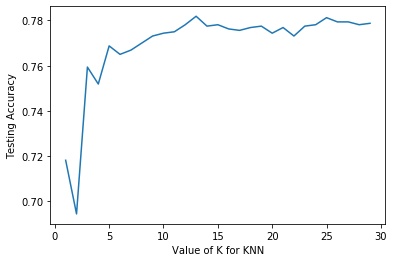

In [0]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# Plots the relationship between the range of K vlaues and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

## Optimal numbers of k Testing using Misclassification Error

In [0]:
# changing to misclassification error
# creating list of K for KNN
import seaborn as sns

from sklearn.model_selection import cross_val_score

k_list = list(range(1,31))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, train_data, labelcol, cv=30, scoring='accuracy')
    cv_scores.append(scores.mean())

### Plotting the Misclassification  Error against the number of k neighbors

<Figure size 432x288 with 0 Axes>

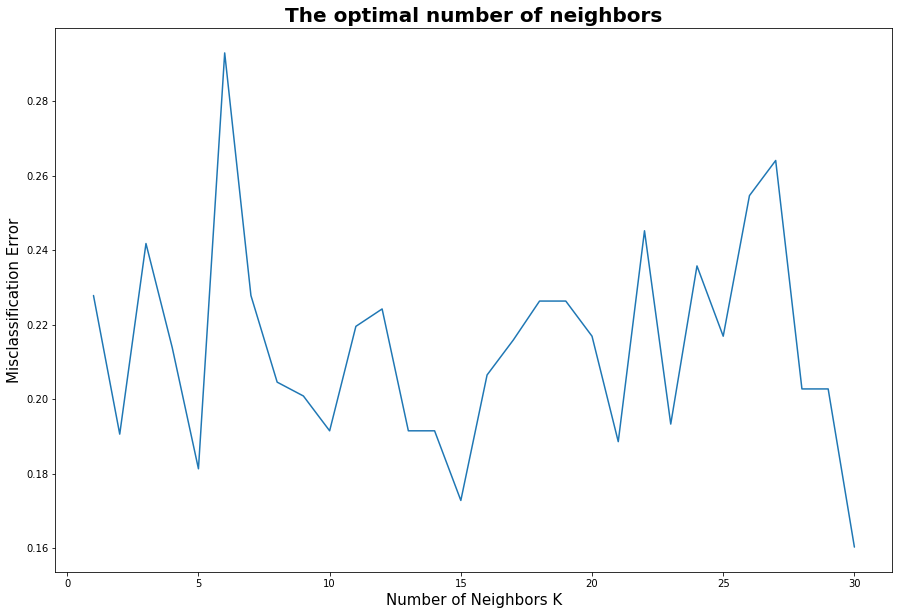

In [0]:
MSE = [1 - x for x in scores]
train_data = np.array(train_data)
labelcol = np.array(labelcol)
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

## 6) Confusion Matrix
- A confusion matrix was plotted

[[337  49   4  12]
 [ 15 285  64  29]
 [  8  56 317  14]
 [ 15  80  23 292]]


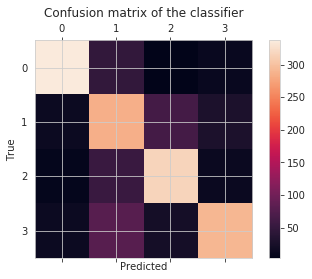

In [0]:
labels = ['metal', 'classical', 'hiphop', 'country']
cm = metrics.confusion_matrix(label_test, knn_pred)
print(cm)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix of the Genre Classifier', y=1.08)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

## 7) Defining functions to determine precision and recall
- `precision`
- `recall`
- `precision_macro_average`
- `recall_macro_average`

In [0]:
def precision(label, confusion_matrix):
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()
    
def recall(label, confusion_matrix):
    row = confusion_matrix[label, :]
    return confusion_matrix[label, label] / row.sum()
def precision_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_precisions = 0
    for label in range(rows):
        sum_of_precisions += precision(label, confusion_matrix)
    return sum_of_precisions / rows
def recall_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_recalls = 0
    for label in range(columns):
        sum_of_recalls += recall(label, confusion_matrix)
    return sum_of_recalls / columns

## 8) Printing the precision and recall values for each label

Sample output shown below


In [0]:
print("label precision recall")
for label in range(4):
    print(f"{label:5d} {precision(label, cm):9.3f} {recall(label, cm):6.3f}")

label precision recall
    0     0.895  0.840
    1     0.591  0.731
    2     0.808  0.763
    3     0.831  0.739


## 9) Printing the total precision and recall

In [0]:
print("precision total:", precision_macro_average(cm))
print("recall total:", recall_macro_average(cm))

precision total: 0.7812067773202016
recall total: 0.7682392198641741


In [0]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

In [0]:
accuracy(cm)

0.76875